<a href="https://colab.research.google.com/github/strongeryoung/class_SmartDataAnalysis/blob/main/NAVER_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library and font setting

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import re
import os
%matplotlib inline
from matplotlib import rcParams
from matplotlib import font_manager, rc
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 12
# [출처] [파이썬] colab에서 plt 한글깨짐 해결|작성자 서울시립대 통계학과

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,283 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

In [ ]:
# import os

# 본인의 경로를 인식 시킨다 !!! (중요)
os.chdir('/content/drive/MyDrive/')

# .py 파일의 내용을 전부 import 한다
# from KEYS import *

In [ ]:
pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

# 사용자 함수를 지정

In [ ]:
def get_plot_chart(df, x_col, y_col):

    # 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_col], df[y_col], marker='o')
    plt.title('Ratio Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

def module_for_datelist(start, end, end_month):

    y_list = []

    #start = 2015
    #end = 2024
    #end_month = 4

    month_list = ['01', '02', '03', '04','05','06','07','08','09','10', '11', '12']

    for y in range(start, end):
        if y != end-1:
            for j in month_list:
                y_value = str(y)+str(j)
                y_list.append(y_value)
        else:
            for j in month_list[:end_month]:
                y_value = str(y)+str(j)
                y_list.append(y_value)
    return y_list

def module_for_tourist_num(country_code, ed_code, dt_list):

    key =  KEYS['o1nD_O3ROaVpARtJmShV']
    # 국가코드  중국 (112)
    # 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
    row_list = [] # 행값
    name_list = [] # 열이름값
    value_list = [] #데이터값

    nat_cd = str(country_code)
    ED_cd = ed_code

    for dt in dt_list:
        #print(dt)
        url = f'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList?YM={dt}&NAT_CD={nat_cd}&ED_CD={ED_cd}&serviceKey={key}'
        response = requests.get(url)
        data = response.text
        # data = json.loads(data)

        # 깔끔한 출력 위한 코드
        pp = pprint.PrettyPrinter(indent=4)
        #print(pp.pprint(data))

        ## 각 컬럼 값 ## (포털 문서에서 꼭 확인하세요)
        #bs4 사용하여 item 태그 분리
        xml_obj = bs4.BeautifulSoup(data,'lxml-xml')
        rows = xml_obj.findAll('item')
        # print(rows)

        # xml 안의 데이터 수집
        for i in range(0, len(rows)):
            columns = rows[i].find_all()
            #첫째 행 데이터 수집
            for j in range(0,len(columns)):
                if i ==0:
                    # 컬럼 이름 값 저장
                    name_list.append(columns[j].name)
                # 컬럼의 각 데이터 값 저장
                value_list.append(columns[j].text)
            # 각 행의 value값 전체 저장
            row_list.append(value_list)

            # 데이터 리스트 값 초기화
            value_list=[]

    data_frame = pd.DataFrame(row_list, columns=['항목', '구분', '코드', '국적', '입국자수', '나열순', '날짜'])
    # 데이터 형태 확인
    # data_frame.info()
    data_frame['날짜']  = pd.to_datetime(data_frame['날짜'], format='%Y%m')+ pd.offsets.MonthEnd(1)
    data_frame['입국자수'] = data_frame['입국자수'].astype('int64')
    data_frame = data_frame.set_index('날짜')

    return data_frame


def get_clean_text(df, keyword):
    df['title'] = df['title'].apply(lambda x: re.sub(r'<.*?>', '', x))           # tag 정보제거 정규식
    df['title'] = df['title'].apply(lambda x: re.sub(r'&quot;', '', x))
    df['contents'] = df['contents'].apply(lambda x: re.sub(r'<.*?>', '', x))
    df['contents'] = df['contents'].apply(lambda x: re.sub(r'&quot;', '', x))
    if keyword == 'news':
        df['date'] = pd.to_datetime(df['date'], format='%a, %d %b %Y %H:%M:%S +0900')
    else: pass

    return df

# NAVER API 활용

>- link : https://developers.naver.com/main/



## 1.1 데이터랩

### 1.1.1 통합검색어 트랜드 개요와 개발 가이드
>
>- link : https://developers.naver.com/products/service-api/datalab/datalab.md
>
>- 개발 가이드 link :
>
>  https://developers.naver.com/docs/serviceapi/datalab/search/search.md#%ED%86%B5%ED%95%A9-%EA%B2%80%EC%83%89%EC%96%B4-%ED%8A%B8%EB%A0%8C%EB%93%9C

### 1.1.2 검색어 트렌드 API 사용

In [ ]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import json
import datetime

client_id = KEYS['NAVER_ID']      # 본인의 ID "XXXXX" 형태로 입력 (중요)
client_secret = KEYS['NAVER_SEC'] # 본인의 SECRET "XXXXX" 형태로 입력 (중요)

client_id = " ,"      # 본인의 ID "XXXXX" 형태로 입력 (중요)
client_secret = KEYS['NAVER_SEC']

start_dt = '2016-01-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
inter = 'month'
keyword_kr = '주식시장'
keyword_en = 'KOSPI'
devc = ''
sex = 'f'

url = "https://openapi.naver.com/v1/datalab/search";
body = f"{{\"startDate\":\"{start_dt}\",\"endDate\":\"{end_dt}\",\"timeUnit\":\"{inter}\",\"keywordGroups\":[{{\"groupName\":\"{keyword_kr}\",\"keywords\":[\"{keyword_kr}\",\"{keyword_en}\"]}}],\"device\":\"{devc}\",\"ages\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\"],\"gender\":\"{sex}\"}}"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# JSON 데이터를 파이썬 객체로 변환
data = json.loads(response_body)

# "data" 항목을 데이터프레임으로 변환
df = pd.DataFrame(data["results"][0]["data"])

# 결과 확인
df = df.iloc[:-1].copy()

# 'period' 열을 datetime 형식으로 변환
df['period'] = pd.to_datetime(df['period'])
df.set_index(df['period'] + pd.DateOffset(months=1) - pd.DateOffset(days=1), inplace=True)


{"startDate":"2016-01-01","endDate":"2023-09-30","timeUnit":"month","results":[{"title":"주식시장","keywords":["주식시장","KOSPI"],"data":[{"period":"2016-01-01","ratio":3.72604},{"period":"2016-02-01","ratio":2.81549},{"period":"2016-03-01","ratio":3.24715},{"period":"2016-04-01","ratio":2.27108},{"period":"2016-05-01","ratio":2.7991},{"period":"2016-06-01","ratio":4.16734},{"period":"2016-07-01","ratio":2.49366},{"period":"2016-08-01","ratio":2.43199},{"period":"2016-09-01","ratio":2.61218},{"period":"2016-10-01","ratio":3.57091},{"period":"2016-11-01","ratio":6.81325},{"period":"2016-12-01","ratio":5.78996},{"period":"2017-01-01","ratio":4.14422},{"period":"2017-02-01","ratio":4.63948},{"period":"2017-03-01","ratio":4.4593},{"period":"2017-04-01","ratio":6.72171},{"period":"2017-05-01","ratio":5.93449},{"period":"2017-06-01","ratio":8.53126},{"period":"2017-07-01","ratio":6.00387},{"period":"2017-08-01","ratio":7.17458},{"period":"2017-09-01","ratio":4.30513},{"period":"2017-10-01","ratio":

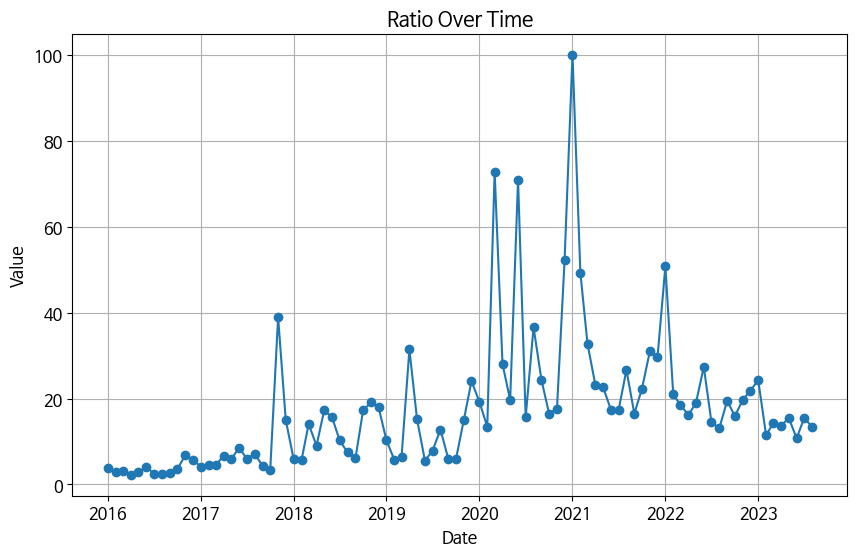

In [ ]:
# 시각화 확인
get_plot_chart(df, 'period', 'ratio')

###  1.1.3 검색어 트렌드 API Code 함수화

In [ ]:
# 함수화를 통해 다수의 검색어 사용 용이하게 코드변형

def get_naver_search_trend(start_dt, end_dt, keyword_kr, inter, devc, sex):

    # keyword_kr = input("한글 검색명 입력 :")
    # keyword_en = input("영문 검색명 입력 :")


    url = "https://openapi.naver.com/v1/datalab/search";
    body = f"{{\"startDate\":\"{start_dt}\",\"endDate\":\"{end_dt}\",\"timeUnit\":\"{inter}\",\"keywordGroups\":[{{\"groupName\":\"{keyword_kr}\",\"keywords\":[\"{keyword_kr}\"]}}],\"device\":\"{devc}\",\"ages\":[\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\"],\"gender\":\"{sex}\"}}"

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

    data = json.loads(response_body)

    # "data" 항목을 데이터프레임으로 변환
    df = pd.DataFrame(data["results"][0]["data"])

    df.columns = ['기간', '검색지수']

    # 'period' 컬럼을 datetime 형식으로 변환
    df['기간'] = pd.to_datetime(df['기간'])

    # 시각화
    plt.figure(figsize=(8, 6))
    plt.plot(df['기간'], df['검색지수'], marker='o')
    plt.title(f'{keyword_kr} Trend over Time')
    plt.xlabel('기간(week)')
    plt.ylabel('검색지수')
    plt.xticks(rotation=45)
    # plt.grid()

    plt.tight_layout()

    plt.show()

    return df


In [ ]:
keyword_kr = '코스피'
start_dt = '2016-01-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=0)).strftime('%Y-%m-%d')
inter = 'month'
devc = 'mo'
sex = ''

kospi_trend_df = get_naver_search_trend(start_dt, end_dt, keyword_kr, inter, devc, sex)
kospi_trend_df.head(5)

###  1.1.4 검색어 트렌드의 이동평균 및 변동률 정보 추가

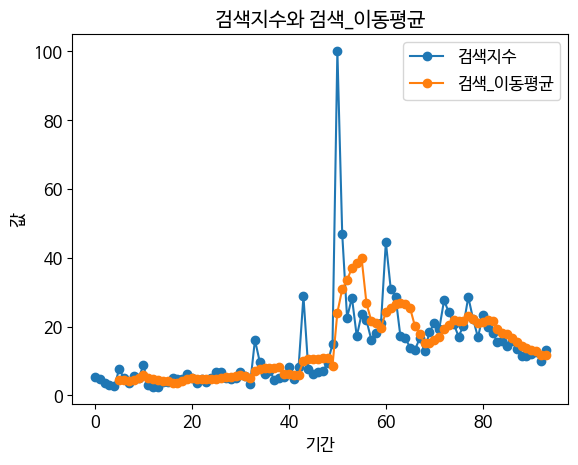

In [ ]:
kospi_trend_df['검색_이동평균'] = kospi_trend_df['검색지수'].rolling(window=6).mean()
trend_df = kospi_trend_df.dropna().copy()
trend_df['검색지수_변화율'] = trend_df['검색_이동평균'].pct_change()
trend_df_re = trend_df.set_index('기간')

df = kospi_trend_df.copy()

# 기간을 인덱스로 설정
# df.set_index('기간')

# 검색지수 그래프
plt.plot(df['검색지수'], label='검색지수', marker='o')

# 검색_이동평균 그래프
plt.plot(df['검색_이동평균'], label='검색_이동평균', marker='o')

# 그래프 제목과 레이블 추가
plt.title('검색지수와 검색_이동평균')
plt.xlabel('기간')
plt.ylabel('값')

# 범례 추가
plt.legend()

# 그래프 보이기
plt.show()

In [ ]:
trend_df_re.head(5)

,검색지수,검색_이동평균,검색지수_변화율
기간,,,
2016-06-01,7.64488,4.503210,NaN
2016-07-01,5.02091,4.446035,-0.012696
2016-08-01,3.60605,4.261750,-0.041449
2016-09-01,5.62248,4.593868,0.077930
2016-10-01,5.00951,4.932710,0.073760


### 1.1.5 복수 검색어 트렌드 수집

{"startDate":"2016-01-01","endDate":"2023-10-28","timeUnit":"month","results":[{"title":"미국여행","keywords":["미국여행"],"data":[{"period":"2016-01-01","ratio":70.11882},{"period":"2016-02-01","ratio":61.91805},{"period":"2016-03-01","ratio":60.19089},{"period":"2016-04-01","ratio":60.8402},{"period":"2016-05-01","ratio":61.43107},{"period":"2016-06-01","ratio":61.02201},{"period":"2016-07-01","ratio":65.61911},{"period":"2016-08-01","ratio":67.95662},{"period":"2016-09-01","ratio":60.04155},{"period":"2016-10-01","ratio":58.29491},{"period":"2016-11-01","ratio":58.48321},{"period":"2016-12-01","ratio":62.84656},{"period":"2017-01-01","ratio":83.87117},{"period":"2017-02-01","ratio":68.42412},{"period":"2017-03-01","ratio":63.43743},{"period":"2017-04-01","ratio":57.99623},{"period":"2017-05-01","ratio":61.62586},{"period":"2017-06-01","ratio":63.54132},{"period":"2017-07-01","ratio":67.46964},{"period":"2017-08-01","ratio":67.33978},{"period":"2017-09-01","ratio":55.8665},{"period":"2017-10

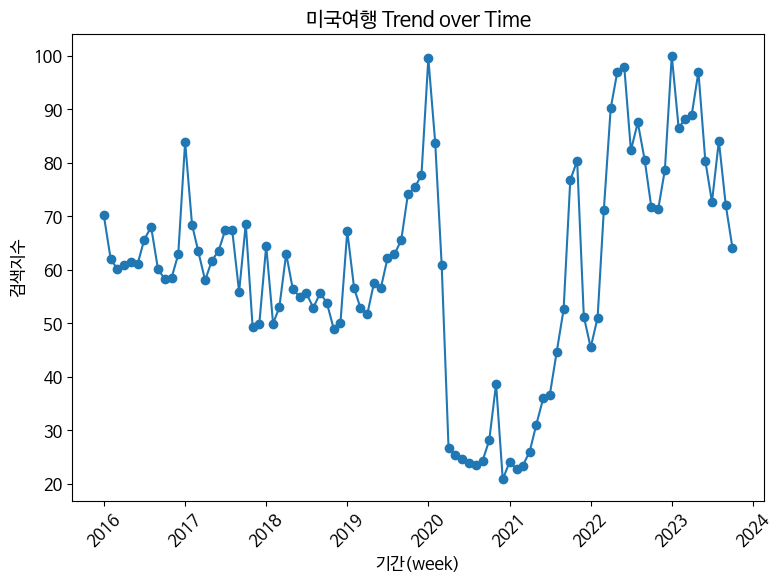

{"startDate":"2016-01-01","endDate":"2023-10-28","timeUnit":"month","results":[{"title":"베트남여행","keywords":["베트남여행"],"data":[{"period":"2016-01-01","ratio":27.64888},{"period":"2016-02-01","ratio":22.93574},{"period":"2016-03-01","ratio":20.03019},{"period":"2016-04-01","ratio":22.62036},{"period":"2016-05-01","ratio":23.95319},{"period":"2016-06-01","ratio":26.21875},{"period":"2016-07-01","ratio":26.00067},{"period":"2016-08-01","ratio":22.0936},{"period":"2016-09-01","ratio":27.3964},{"period":"2016-10-01","ratio":31.71951},{"period":"2016-11-01","ratio":30.60895},{"period":"2016-12-01","ratio":35.24995},{"period":"2017-01-01","ratio":39.52189},{"period":"2017-02-01","ratio":41.42258},{"period":"2017-03-01","ratio":39.45982},{"period":"2017-04-01","ratio":31.55175},{"period":"2017-05-01","ratio":34.50847},{"period":"2017-06-01","ratio":49.78527},{"period":"2017-07-01","ratio":47.02063},{"period":"2017-08-01","ratio":42.03069},{"period":"2017-09-01","ratio":32.42744},{"period":"2017-

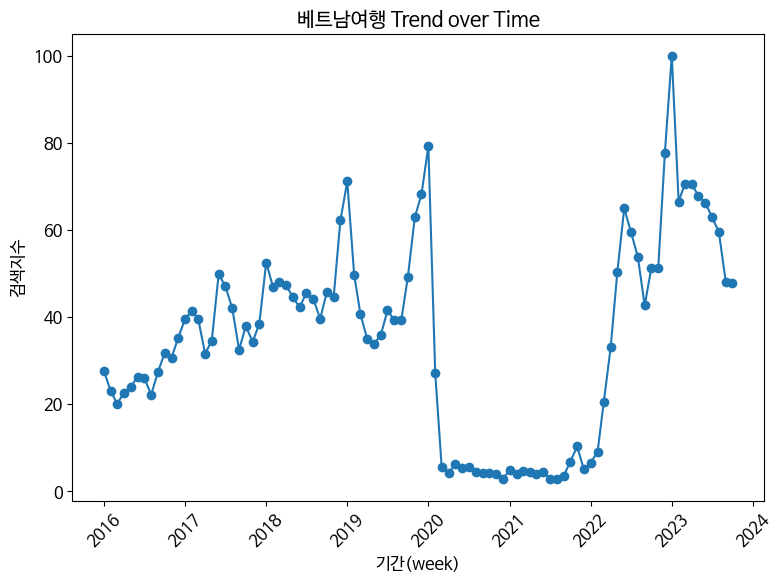

{"startDate":"2016-01-01","endDate":"2023-10-28","timeUnit":"month","results":[{"title":"일본여행","keywords":["일본여행"],"data":[{"period":"2016-01-01","ratio":25.85064},{"period":"2016-02-01","ratio":20.98344},{"period":"2016-03-01","ratio":16.99641},{"period":"2016-04-01","ratio":17.28213},{"period":"2016-05-01","ratio":12.39892},{"period":"2016-06-01","ratio":19.52558},{"period":"2016-07-01","ratio":19.2804},{"period":"2016-08-01","ratio":18.42099},{"period":"2016-09-01","ratio":18.07498},{"period":"2016-10-01","ratio":15.88432},{"period":"2016-11-01","ratio":16.79976},{"period":"2016-12-01","ratio":23.00048},{"period":"2017-01-01","ratio":29.51793},{"period":"2017-02-01","ratio":21.9842},{"period":"2017-03-01","ratio":18.14453},{"period":"2017-04-01","ratio":18.48254},{"period":"2017-05-01","ratio":21.1846},{"period":"2017-06-01","ratio":24.83462},{"period":"2017-07-01","ratio":25.75882},{"period":"2017-08-01","ratio":21.21762},{"period":"2017-09-01","ratio":16.73872},{"period":"2017-10-

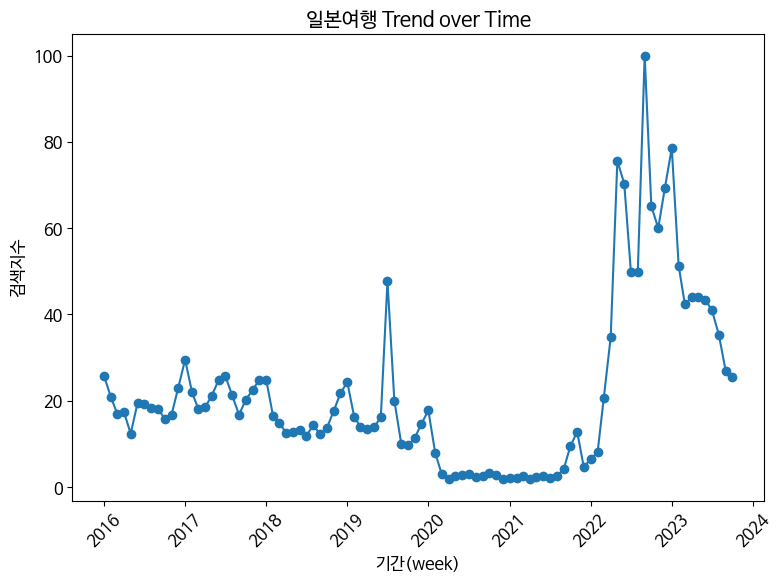

{"startDate":"2016-01-01","endDate":"2023-10-28","timeUnit":"month","results":[{"title":"중국여행","keywords":["중국여행"],"data":[{"period":"2016-01-01","ratio":32.2176},{"period":"2016-02-01","ratio":31.25451},{"period":"2016-03-01","ratio":30.7966},{"period":"2016-04-01","ratio":37.14754},{"period":"2016-05-01","ratio":37.8792},{"period":"2016-06-01","ratio":34.98743},{"period":"2016-07-01","ratio":33.7257},{"period":"2016-08-01","ratio":28.03175},{"period":"2016-09-01","ratio":25.83679},{"period":"2016-10-01","ratio":22.6663},{"period":"2016-11-01","ratio":20.09805},{"period":"2016-12-01","ratio":25.93136},{"period":"2017-01-01","ratio":36.84145},{"period":"2017-02-01","ratio":32.43162},{"period":"2017-03-01","ratio":100},{"period":"2017-04-01","ratio":30.13712},{"period":"2017-05-01","ratio":22.35024},{"period":"2017-06-01","ratio":23.33822},{"period":"2017-07-01","ratio":28.41002},{"period":"2017-08-01","ratio":28.14374},{"period":"2017-09-01","ratio":26.52614},{"period":"2017-10-01","ra

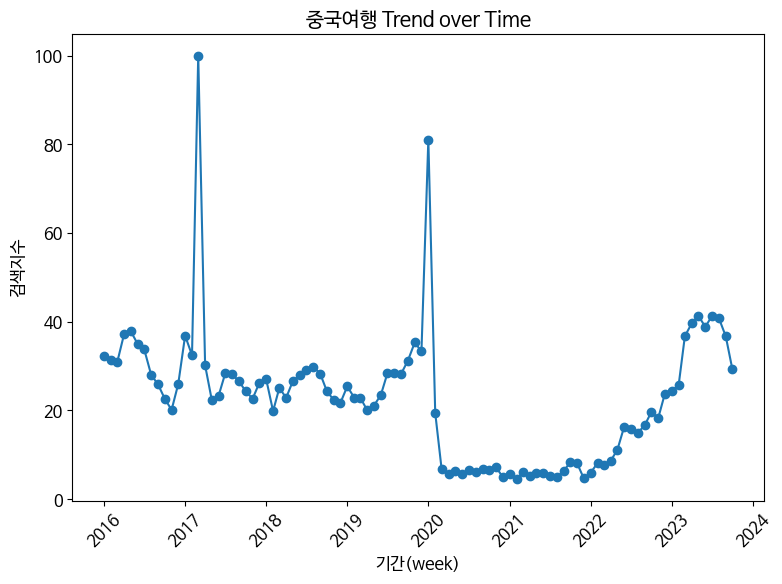

{"startDate":"2016-01-01","endDate":"2023-10-28","timeUnit":"month","results":[{"title":"유럽여행","keywords":["유럽여행"],"data":[{"period":"2016-01-01","ratio":76.37713},{"period":"2016-02-01","ratio":64.68355},{"period":"2016-03-01","ratio":64.85091},{"period":"2016-04-01","ratio":60.07778},{"period":"2016-05-01","ratio":63.7855},{"period":"2016-06-01","ratio":75.63229},{"period":"2016-07-01","ratio":73.48025},{"period":"2016-08-01","ratio":58.02946},{"period":"2016-09-01","ratio":57.18562},{"period":"2016-10-01","ratio":62.67059},{"period":"2016-11-01","ratio":63.68414},{"period":"2016-12-01","ratio":68.16971},{"period":"2017-01-01","ratio":79.25515},{"period":"2017-02-01","ratio":59.9175},{"period":"2017-03-01","ratio":47.96935},{"period":"2017-04-01","ratio":42.57159},{"period":"2017-05-01","ratio":43.93635},{"period":"2017-06-01","ratio":40.63641},{"period":"2017-07-01","ratio":41.26104},{"period":"2017-08-01","ratio":41.14555},{"period":"2017-09-01","ratio":34.59281},{"period":"2017-10

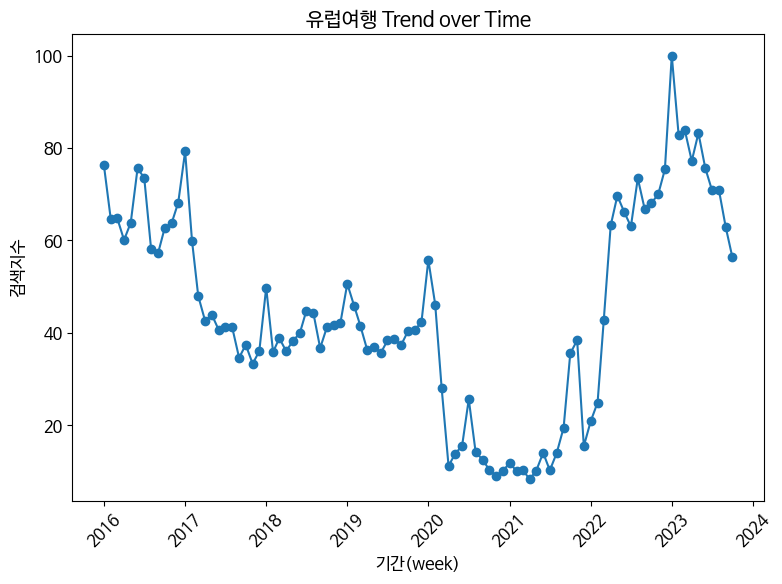

In [ ]:
keyword_list = ['미국여행', '베트남여행', '일본여행', '중국여행', '유럽여행']

start_dt = '2016-01-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=0)).strftime('%Y-%m-%d')
inter = 'month'
devc = 'mo'
sex = 'f'

result_df = []

for keyword in keyword_list:

    trend_df = get_naver_search_trend(start_dt, end_dt, keyword, inter, devc, sex)
    trend_df['keyword'] = keyword
    result_df.append(trend_df)

In [ ]:
# 복수 검색어 코드 함수화

def get_naver_multi_search_trend(start_dt, end_dt, keyword, inter, devc, sex):

    result_list = []

    for keyword in keyword_list:

        trend_df = get_naver_search_trend(start_dt, end_dt, keyword, inter, devc, sex)
        trend_df['keyword'] = keyword
        result_list.append(trend_df)

    result_df = pd.concat(result_list)

    return result_df

In [ ]:
keyword_list = ['미국여행', '베트남여행', '일본여행', '중국여행', '유럽여행']

start_dt = '2016-01-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
inter = 'month'
devc = 'mo'
sex = 'f'

df = get_naver_multi_search_trend(start_dt, end_dt, keyword, inter, devc, sex)
# df.to_excel('/content/drive/MyDrive/Smart_Data_Analysis_Class_202302_비공개/Week_8/search_result.xlsx')

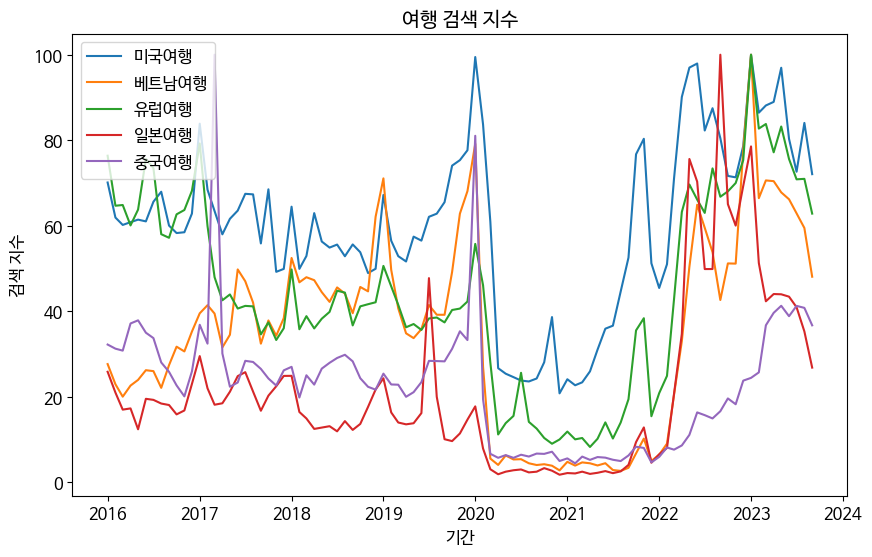

In [ ]:
# pivot_table을 사용하여 keyword별로 데이터 정리
df_pivot = df.pivot_table(index='기간', columns= 'keyword', values='검색지수')

# plot 그리기
plt.figure(figsize=(10, 6))

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.xlabel('기간')
plt.ylabel('검색 지수')
plt.title('여행 검색 지수')
plt.legend()
plt.show()

In [ ]:
# 해외여행 검색어 간의 상관관계 분석
taravel_search_chg = df_pivot.pct_change()
taravel_search_chg.corr()

keyword,미국여행,베트남여행,유럽여행,일본여행,중국여행
keyword,,,,,
미국여행,1.000000,0.588350,0.635335,0.487167,0.313513
베트남여행,0.588350,1.000000,0.695476,0.661227,0.338830
유럽여행,0.635335,0.695476,1.000000,0.588794,0.259226
일본여행,0.487167,0.661227,0.588794,1.000000,0.231191
중국여행,0.313513,0.338830,0.259226,0.231191,1.000000


### 1.1.6 검색어 트렌드 활용사례 1

- 코스피지수 지수 검색 트랜드를 이용한 주식시장 기간 성과 예측

- 주식시장 기간수익률(종속변수)과 검색지수 변화율(독립변수) 단순 선형 회귀분석


In [ ]:
# 예시 KOSPI지수, 2018년
kospi_df = fdr.DataReader('KS11', '2016')
kospi_monthly_df = kospi_df.resample('M').last()
kospi_monthly_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-31,1905.010010,1912.069946,1888.479980,1912.060059,1912.060059,386600
2016-02-29,1921.760010,1927.050049,1916.660034,1916.660034,1916.660034,275100
2016-03-31,2005.719971,2007.430054,1986.739990,1995.849976,1995.849976,335100
2016-04-30,1998.680054,1999.339966,1983.300049,1994.150024,1994.150024,401100
2016-05-31,1962.469971,1984.180054,1958.160034,1983.400024,1983.400024,657000
...,...,...,...,...,...,...
2023-06-30,2558.429932,2571.030029,2541.719971,2564.280029,2564.280029,508800
2023-07-31,2628.870117,2639.449951,2622.209961,2632.580078,2632.580078,454200
2023-08-31,2564.449951,2568.060059,2547.719971,2556.270020,2556.270020,471900


  - 코스피지수의 기간별 수익률 측정

    - 특정 데이터의 기간별 변화율을 구하는 함수는 .pct_change()

In [ ]:
kospi_monthly_df['ret_1m'] = kospi_monthly_df['Adj Close'].pct_change()
kospi_monthly_df['ret_3m'] = kospi_monthly_df['Adj Close'].pct_change(3)
kospi_monthly_df['ret_6m'] = kospi_monthly_df['Adj Close'].pct_change(6)
kospi_monthly_df['ret_12m'] = kospi_monthly_df['Adj Close'].pct_change(12)

time_index = kospi_monthly_df.index[:]
kospi_trend_df.index = time_index

kospi_trend_df['검색지수_변화율'] = kospi_trend_df['검색지수'].pct_change()

ret_senti_df = pd.concat([kospi_monthly_df[['ret_1m',  'ret_3m', 'ret_6m', 'ret_12m']], kospi_trend_df[['검색지수', '검색지수_변화율']]], axis=1)

ret_senti_df_drop = ret_senti_df.dropna()

In [ ]:
ret_senti_df_drop.head(3)

,ret_1m,ret_3m,ret_6m,ret_12m,검색지수,검색지수_변화율
Date,,,,,,
2017-01-31,0.020287,0.029569,0.025484,0.081331,2.52150,-0.194200
2017-02-28,0.011642,0.054530,0.028010,0.091294,2.47407,-0.018810
2017-03-31,0.032792,0.066012,0.057055,0.082361,3.88719,0.571172


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


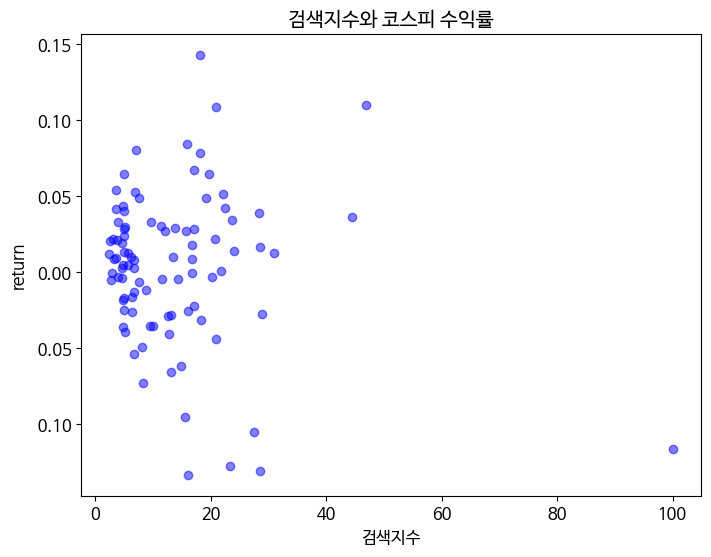

In [ ]:
# Scatter plot 그리기
plt.figure(figsize=(8, 6))
plt.scatter(ret_senti_df['검색지수'], ret_senti_df['ret_1m'], color='blue', alpha=0.5)

# 레이블과 제목 설정
plt.xlabel('검색지수')
plt.ylabel('return')
plt.title('검색지수와 코스피 수익률')

# 그래프 표시
plt.show()

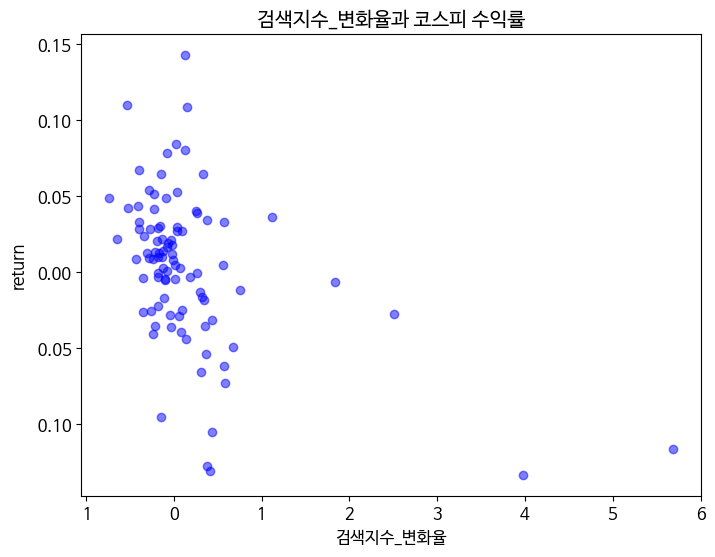

In [ ]:
# Scatter plot 그리기
plt.figure(figsize=(8, 6))
plt.scatter(ret_senti_df['검색지수_변화율'], ret_senti_df['ret_1m'], color='blue', alpha=0.5)

# 레이블과 제목 설정
plt.xlabel('검색지수_변화율')
plt.ylabel('return')
plt.title('검색지수_변화율과 코스피 수익률')

# 그래프 표시
plt.show()

In [ ]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = ret_senti_df_drop['검색지수']
y = ret_senti_df_drop['ret_1m']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 생성 및 피팅
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_1m   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.871
Date:                Sat, 28 Oct 2023   Prob (F-statistic):              0.175
Time:                        03:58:54   Log-Likelihood:                 125.51
No. Observations:                  82   AIC:                            -247.0
Df Residuals:                      80   BIC:                            -242.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.009      1.361      0.1

In [ ]:
# 독립 변수와 종속 변수 설정
X = ret_senti_df_drop['검색지수_변화율']
y = ret_senti_df_drop['ret_1m']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 생성 및 피팅
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_1m   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     21.66
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.27e-05
Time:                        03:58:59   Log-Likelihood:                 134.39
No. Observations:                  82   AIC:                            -264.8
Df Residuals:                      80   BIC:                            -260.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.005      1.396      0.1

**<회귀식 결과의 해설>**

이 회귀분석 결과는 종속 변수(`Dep. Variable`)인 `ret_1m` (1개월 수익률)과 독립 변수(`검색지수_변화율`) 간의 관계를 나타냅니다. 여기서 사용된 모델은 최소 제곱법(OLS, Ordinary Least Squares)을 이용한 선형 회귀모델입니다.

해당 결과를 해석해보겠습니다:

1. **모델 적합도:**
   - 결정계수(`R-squared`): 0.215
     - 이 값은 종속 변수의 변동 중 독립 변수로 설명 가능한 비율을 나타냅니다. 0.215는 모델이 종속 변수의 21.5%의 변동을 설명한다는 것을 의미합니다.

   - 조정된 결정계수(`Adj. R-squared`): 0.205
     - 독립 변수의 개수와 관련된 보정값으로, 모델의 복잡성을 고려합니다. 보통 조정된 결정계수가 높을수록 모델이 더 신뢰할 만하다고 볼 수 있습니다.

2. **회귀계수:**
   - `const`(상수항)의 회귀계수(coef): 0.0082
     - 상수항은 독립 변수가 0일 때 종속 변수의 예측값입니다. 이 경우에는 `ret_1m`이 0일 때의 예측값이 0.0082입니다.

   - `검색지수_변화율`의 회귀계수(coef): -0.0284
     - `검색지수_변화율`이 1 단위 증가할 때, `ret_1m`이 약 -0.0284 만큼 감소한다고 해석됩니다.

3. **통계적 유의성:**
   - F-통계량(`F-statistic`): 21.63
     - 모델 전체의 유의성을 나타냅니다. 높을수록 모델이 전체적으로 유의미하다고 볼 수 있습니다.

   - P-value(`Prob (F-statistic)`): 1.31e-05 (매우 작음)
     - F-통계량의 p-value가 매우 작으므로, 이 모델이 통계적으로 유의미하다고 할 수 있습니다.

   - 각 회귀계수의 P-value:
     - `const`: 0.128 (유의하지 않음)
     - `검색지수_변화율`: 0.000 (매우 작음)
       - `검색지수_변화율`의 p-value가 매우 작으므로, 이 변수는 `ret_1m`을 예측하는 데 매우 유의미한 영향을 미친다고 할 수 있습니다.

4. **모델의 적합도 검정:**
   - 오민버스 테스트(`Omnibus`), 자크-베라 테스트(`Jarque-Bera (JB)`):
     - 모델의 정규성 가정을 확인하는 테스트입니다. 이 결과들은 모두 정규성 가정을 만족한다는 것을 나타내며, 특별한 문제는 없는 것으로 보입니다.

5. **기타 정보:**
   - Durbin-Watson 통계량: 2.138
     - 자기상관을 검사하는 통계량입니다. 보통 2에 가까울수록 자기상관이 없다고 판단합니다.

   - 관측치 수: 81
   - 모델의 자유도: 1 (독립 변수 1개)
   - 잔차의 자유도: 79
   - 모델의 조건수(Condition Number): 1.25
     - 다중공선성을 검사하는데 사용되며, 값이 높을수록 다중공선성이 있을 가능성이 있습니다.

이 결과를 통해, `검색지수_변화율`이 `ret_1m`을 예측하는 데 중요한 변수임을 알 수 있습니다.

### 1.1.7 검색어 트렌드 활용사례 2

- 코스피지수 지수 검색 트랜드와 미국의 중요 경제변수를 결합하여 코스피지수 기간성과 예측

- 주식시장 기간수익률(종속변수)과 검색지수 변화율 및 미국의 주요 경제지표 11개를 결합시킨 다변량 회귀분석 시행

In [ ]:
from datetime import datetime
date_info = datetime.now().strftime('%Y-%m-%m')

data_tickers = 'FRED: T10Y2Y, BAMLH0A0HYM2, BAMLC0A3CA, CPIAUCNS, WTISPLC, UMCSENT, CSUSHPINSA, HSN1F, IPMAN, AMTMNO, VIXCLS'

macro_data = fdr.DataReader(data_tickers, '2000-01-01', date_info)

# 월말 데이터 추출
macro_month_end = macro_data.resample('M').last()

In [ ]:
macro_data_change = macro_month_end[[ 'T10Y2Y', 'BAMLH0A0HYM2',  'BAMLC0A3CA', 'VIXCLS', 'CPIAUCNS',	'WTISPLC',	'UMCSENT',	'CSUSHPINSA',	'HSN1F',	'IPMAN',	'AMTMNO']].pct_change().shift(2)
macro_data_change

,T10Y2Y,BAMLH0A0HYM2,BAMLC0A3CA,VIXCLS,CPIAUCNS,WTISPLC,UMCSENT,CSUSHPINSA,HSN1F,IPMAN,AMTMNO
DATE,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,-2.571429,0.043121,0.045872,-0.063327,0.005924,0.079838,-0.006250,0.005710,-0.019473,0.002677,-0.053415
2000-05-31,3.272727,0.131890,0.131579,0.031665,0.008245,0.018399,-0.037736,0.008899,0.051402,0.006938,0.036721
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,0.034483,-0.010917,-0.032787,-0.156150,0.005059,0.084198,0.027419,0.013938,0.060938,0.010018,0.002611
2023-07-31,0.266667,0.035320,0.008475,0.136882,0.002518,-0.099056,-0.073783,0.013133,0.045655,-0.002383,0.003834
2023-08-31,0.394737,-0.136461,-0.075630,-0.242475,0.003229,-0.018581,0.088136,0.009479,-0.038028,-0.006101,0.023307


- 검색지수 변화율 data와 경제지표 데이터의 결합

In [ ]:
regression_df = pd.concat([ret_senti_df_drop, macro_data_change], axis=1, join= 'inner')
regression_df.head(10)

,ret_1m,ret_3m,ret_6m,ret_12m,검색지수,검색지수_변화율,T10Y2Y,BAMLH0A0HYM2,BAMLC0A3CA,VIXCLS,CPIAUCNS,WTISPLC,UMCSENT,CSUSHPINSA,HSN1F,IPMAN,AMTMNO
2017-01-31,0.020287,0.029569,0.025484,0.081331,2.52150,-0.194200,0.285714,-0.048880,-0.027027,-0.218640,-0.001555,-0.082764,0.075688,0.001152,-0.006957,-0.000767,-0.035883
2017-02-28,0.011642,0.054530,0.028010,0.091294,2.47407,-0.018810,-0.007937,-0.096360,-0.037037,0.053263,0.000327,0.138195,0.046908,0.000934,-0.017513,0.000333,0.020089
2017-03-31,0.032792,0.066012,0.057055,0.082361,3.88719,0.571172,0.008000,-0.052133,0.000000,-0.146011,0.005828,0.010198,0.003055,0.001361,0.021390,0.001914,-0.000885
2017-04-30,0.020928,0.066682,0.098223,0.105955,3.78617,-0.025988,-0.095238,-0.065000,-0.057692,0.077565,0.003146,0.018476,-0.022335,0.001982,0.024433,-0.000803,0.011630
2017-05-31,0.064359,0.122268,0.183465,0.183513,5.04984,0.333759,-0.008772,0.048128,0.020408,-0.042570,0.000813,-0.077427,0.006231,0.008156,0.076661,-0.003458,-0.004484
2017-06-30,0.018919,0.107192,0.180280,0.213891,4.72492,-0.064343,-0.106195,-0.028061,-0.010000,-0.125303,0.002966,0.035070,0.001032,0.010797,-0.053797,0.011537,0.003946
2017-07-31,0.004566,0.089447,0.162094,0.191708,4.78729,0.013200,-0.079208,-0.018373,-0.030303,-0.037893,0.000855,-0.050529,0.001031,0.010592,0.061873,-0.001666,-0.005063
2017-08-31,-0.016448,0.006735,0.129826,0.161472,6.31378,0.318863,0.000000,0.008021,-0.052083,0.073967,0.000907,-0.068069,-0.021627,0.009069,-0.025197,0.000256,0.029871
2017-09-30,0.013236,0.001120,0.108433,0.171675,4.98928,-0.209779,0.032258,-0.042440,-0.054945,-0.082290,-0.000690,0.032094,-0.016842,0.006475,-0.075929,-0.003716,-0.039055
2017-10-31,0.053857,0.050243,0.144184,0.256569,3.58848,-0.280762,-0.177083,0.066482,0.069767,0.032164,0.002994,0.030238,0.036403,0.004315,-0.027972,-0.001949,0.016296


In [ ]:
# 회귀분석 수행
# y 변수와 X 변수 선택
y = regression_df['ret_3m']
X = regression_df[['검색지수_변화율', 'BAMLH0A0HYM2', 'BAMLC0A3CA', 'VIXCLS', 'CPIAUCNS', 'WTISPLC', 'UMCSENT', 'CSUSHPINSA', 'HSN1F', 'IPMAN', 'AMTMNO']]

# 상수항 (intercept) 추가
X = sm.add_constant(X)

# 회귀분석 모델 생성
model = sm.OLS(y, X)

# 모델 피팅
results = model.fit(cov_type='HAC',cov_kwds={'maxlags':18})

# 회귀분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_3m   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     89.87
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           9.12e-37
Time:                        03:59:42   Log-Likelihood:                 101.52
No. Observations:                  82   AIC:                            -179.0
Df Residuals:                      70   BIC:                            -150.2
Df Model:                          11                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0300      0.014      2.153   

- 회귀식 잔차 검증

  - white-test를 이용한 잔차 등분산성 검증

In [ ]:
# 잔차 계산
residuals = y - results.fittedvalues

from statsmodels.stats.diagnostic import het_white

# White Test로 이분산성 확인
white_test = het_white(residuals, X)

# 결과 출력
print(white_test)

(78.83698745045706, 0.4205382868749869, 1.2947871231481713, 0.45347300647107563)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


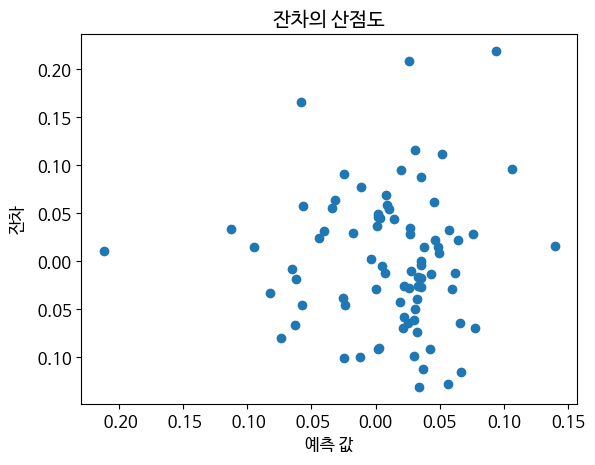

In [ ]:
# 잔차의 산점도 그리기
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("예측 값")
plt.ylabel("잔차")
plt.title("잔차의 산점도")
plt.show()

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

# # 잔차의 ACF 그래프
# plot_acf(residuals, lags=50)
# plt.xlabel("시차")
# plt.ylabel("ACF")
# plt.title("잔차의 ACF")
# plt.show()

### (부연설명) 회귀분석의 다중공선성이란?

다중회귀분석에서 다중공선성은 독립변수들 간에 높은 상관관계가 있을 때 발생하는 문제입니다. 즉, 하나의 독립변수가 다른 독립변수들로부터 예측될 수 있는 상황을 의미합니다. 다중공선성은 회귀모델의 정확도와 신뢰성을 저하시킬 수 있으며, 모델이 불안정해지고 해석이 어려워질 수 있습니다.

다중공선성이 발생하면 일반적으로 다음과 같은 문제들이 발생할 수 있습니다:

1. **계수 추정의 불안정성**: 다중공선성이 높을수록 각 독립변수의 회귀계수 추정값의 신뢰성이 떨어집니다.

2. **변수의 통계적 유의성**: 다중공선성으로 인해 독립변수들의 통계적 유의성을 평가하기 어려워집니다.

3. **모델의 예측 불안정성**: 다중공선성은 모델이 새로운 데이터에 대해 부정확한 예측을 할 수 있게 만들 수 있습니다.

다음은 다중공선성을 다루는 몇 가지 방법입니다:

1. **상관관계 분석**: 독립변수들 간의 상관관계를 확인하고, 높은 상관관계를 가진 변수들을 식별합니다.

2. **VIF 계산**: VIF(Variance Inflation Factor)는 각 독립변수의 다중공선성을 측정하는 지표입니다. 일반적으로 VIF가 10 이상이면 다중공선성이 문제가 될 수 있습니다.

3. **변수 선택 또는 제거**: 상관관계가 높은 변수들 중에서 하나를 선택하거나, 불필요한 변수를 제거하여 다중공선성을 해소할 수 있습니다.

4. **정규화(Regularization)**: Ridge나 Lasso와 같은 정규화 기법을 사용하여 모델을 안정화시키고 다중공선성을 감소시킬 수 있습니다.

다중공선성은 데이터 분석 과정에서 중요한 고려 사항이므로, 모델을 구축하기 전에 주의 깊게 검토하는 것이 좋습니다.

### VIF 측정을 통한 다중공선성 변수 제거

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X 변수에서 상수항 제거
X_no_const = X.drop('const', axis=1)

# 각 변수의 VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X_no_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]

# 결과 출력
print(vif_data)

         feature       VIF
0       검색지수_변화율  1.100731
1   BAMLH0A0HYM2  5.469041
2     BAMLC0A3CA  4.502752
3         VIXCLS  1.792166
4       CPIAUCNS  2.482575
5        WTISPLC  2.496967
6        UMCSENT  1.407137
7     CSUSHPINSA  2.146873
8          HSN1F  1.224586
9          IPMAN  3.382727
10        AMTMNO  3.425445


In [ ]:
# y 변수와 X 변수 선택
y = regression_df['ret_3m']
X = regression_df[['검색지수_변화율', 'VIXCLS']]

# 상수항 (intercept) 추가
X = sm.add_constant(X)

# 회귀분석 모델 생성
model = sm.OLS(y, X)

# 모델 피팅
results = model.fit(cov_type='HAC',cov_kwds={'maxlags':18})

# 회귀분석 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_3m   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     47.28
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.15e-14
Time:                        03:59:58   Log-Likelihood:                 93.147
No. Observations:                  82   AIC:                            -180.3
Df Residuals:                      79   BIC:                            -173.1
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.018      0.999      0.3

### 1.2.1 쇼핑인사이트 개요와 개발 가이드
>
>- link : https://developers.naver.com/products/service-api/datalab/datalab.md
>
>- 개발 가이드 link :
>
>  https://developers.naver.com/docs/serviceapi/datalab/shopping/shopping.md#%EC%87%BC%ED%95%91%EC%9D%B8%EC%82%AC%EC%9D%B4%ED%8A%B8-%EA%B0%9C%EC%9A%94
>
>- 상품 카테고리확인 link :  
> https://shopping.naver.com/home

### 1.2.2 쇼핑 인사이트 API 사용


In [ ]:
import datetime

# 입력 파라미터 조정
start_dt = '2017-08-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
inter = 'month'
cat_name = '패션의류'
cat_num = '50000000'
devc = 'mo'
sex = 'f'

client_id = KEYS['NAVER_SHOPPING_ID']
client_secret = KEYS['NAVER_SHOPPING_SEC']

url = "https://openapi.naver.com/v1/datalab/shopping/categories";
body = f"{{\"startDate\":\"{start_dt}\",\"endDate\":\"{end_dt}\",\"timeUnit\":\"{inter}\",\"category\":[{{\"name\":\"{cat_name}\",\"param\":[\"{cat_num}\"]}}],\"device\":\"{devc}\",\"ages\":[\"20\",\"30\",\"40\",\"50\"],\"gender\":\"{sex}\"}}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)


# JSON 데이터를 파이썬 객체로 변환
data = json.loads(response_body)

# 데이터프레임 생성
results_list = data["results"]

# 결과 리스트에서 각 항목을 추출하여 리스트 생성
result_dicts = []
for result in results_list:
    title = result["title"]
    category = result["category"][0]
    for item in result["data"]:
        item_dict = {
            "title": title,
            "category": category,
            "period": item["period"],
            "ratio": item["ratio"]
        }
        result_dicts.append(item_dict)

df = pd.DataFrame(result_dicts)

# 데이터프레임 확인
print(df)

{"startDate":"2017-08-01","endDate":"2023-09-30","timeUnit":"month","results":[{"title":"패션의류","category":["50000000"],"data":[{"period":"2017-08-01","ratio":42.447},{"period":"2017-09-01","ratio":51.88229},{"period":"2017-10-01","ratio":69.4017},{"period":"2017-11-01","ratio":95.49607},{"period":"2017-12-01","ratio":82.13808},{"period":"2018-01-01","ratio":73.36657},{"period":"2018-02-01","ratio":59.92019},{"period":"2018-03-01","ratio":72.03425},{"period":"2018-04-01","ratio":61.06067},{"period":"2018-05-01","ratio":62.95492},{"period":"2018-06-01","ratio":61.15998},{"period":"2018-07-01","ratio":58.7503},{"period":"2018-08-01","ratio":52.70024},{"period":"2018-09-01","ratio":64.173},{"period":"2018-10-01","ratio":89.06971},{"period":"2018-11-01","ratio":87.48285},{"period":"2018-12-01","ratio":85.81475},{"period":"2019-01-01","ratio":65.0942},{"period":"2019-02-01","ratio":53.85954},{"period":"2019-03-01","ratio":58.60801},{"period":"2019-04-01","ratio":49.09374},{"period":"2019-05-

In [ ]:
# 딕셔너리 형태 안에서 데이터 입력형태 확인
# for item in result["data"]:
#     print(item)

### 1.2.3 쇼핑 인사이트 API Code 함수화



In [ ]:
import datetime

def get_naver_shopping_trend(start_dt, end_dt, inter, cat_name, cat_num, devc, sex):

    client_id = KEYS['NAVER_SHOPPING_ID']
    client_secret = KEYS['NAVER_SHOPPING_SEC']

    url = "https://openapi.naver.com/v1/datalab/shopping/categories";
    body = f"{{\"startDate\":\"{start_dt}\",\"endDate\":\"{end_dt}\",\"timeUnit\":\"{inter}\",\"category\":[{{\"name\":\"{cat_name}\",\"param\":[\"{cat_num}\"]}}],\"device\":\"{devc}\",\"ages\":[\"20\",\"30\",\"40\",\"50\"],\"gender\":\"{sex}\"}}";

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)


    # JSON 데이터를 파이썬 객체로 변환
    data = json.loads(response_body)

    # 데이터프레임 생성
    results_list = data["results"]

    # 결과 리스트에서 각 항목을 추출하여 리스트 생성
    result_dicts = []
    for result in results_list:
        title = result["title"]
        category = result["category"][0]
        for item in result["data"]:
            item_dict = {
                "title": title,
                "category": category,
                "period": item["period"],
                "ratio": item["ratio"]
            }
            result_dicts.append(item_dict)

    df = pd.DataFrame(result_dicts)

    return df

In [ ]:
# 입력 파라미터 조정
start_dt = '2017-08-01'
end_dt = (datetime.datetime.now() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
inter = 'month'
cat_name = '패션의류'
cat_num = '50000000'
devc = 'mo'
sex = 'f'

shopping_trend_df = get_naver_shopping_trend(start_dt, end_dt, inter, cat_name, cat_num, devc, sex)

{"startDate":"2017-08-01","endDate":"2023-09-30","timeUnit":"month","results":[{"title":"패션의류","category":["50000000"],"data":[{"period":"2017-08-01","ratio":42.447},{"period":"2017-09-01","ratio":51.88229},{"period":"2017-10-01","ratio":69.4017},{"period":"2017-11-01","ratio":95.49607},{"period":"2017-12-01","ratio":82.13808},{"period":"2018-01-01","ratio":73.36657},{"period":"2018-02-01","ratio":59.92019},{"period":"2018-03-01","ratio":72.03425},{"period":"2018-04-01","ratio":61.06067},{"period":"2018-05-01","ratio":62.95492},{"period":"2018-06-01","ratio":61.15998},{"period":"2018-07-01","ratio":58.7503},{"period":"2018-08-01","ratio":52.70024},{"period":"2018-09-01","ratio":64.173},{"period":"2018-10-01","ratio":89.06971},{"period":"2018-11-01","ratio":87.48285},{"period":"2018-12-01","ratio":85.81475},{"period":"2019-01-01","ratio":65.0942},{"period":"2019-02-01","ratio":53.85954},{"period":"2019-03-01","ratio":58.60801},{"period":"2019-04-01","ratio":49.09374},{"period":"2019-05-

In [ ]:
shopping_trend_df.head(3)

,title,category,period,ratio
0,패션의류,50000000,2017-08-01,42.44700
1,패션의류,50000000,2017-09-01,51.88229
2,패션의류,50000000,2017-10-01,69.40170


## 2.1  검색 API

>
>- link : https://developers.naver.com/docs/serviceapi/search/news/news.md#%EB%89%B4%EC%8A%A4
>
>- 개발 가이드 link :
>
>  https://developers.naver.com/docs/serviceapi/search/news/news.md#%EA%B2%80%EC%83%89-api-%EB%89%B4%EC%8A%A4-%EA%B2%80%EC%83%89-%EA%B5%AC%ED%98%84-%EC%98%88%EC%A0%9C


### 2.1.1 검색어 입력 및 데이터 전처리

In [ ]:
# 네이버 검색 API 예제 - NEWS 검색
import os
import sys
import urllib.request

client_id = KEYS['NAVER_SEARCH_ID']
client_secret = KEYS['NAVER_SEARCH_SEC']

search = urllib.parse.quote(input("검색어를 입력하세요 : "))
disp = 100     # 검색결과 화면 표시 수
start = 1      # 시작페이지
end = 1000     # 총 검색결과
kind = 'news'


url = f"https://openapi.naver.com/v1/search/{kind}?query=" + search \
                                                        + "&display=" + str(disp) \
                                                        + "&start=" + str(start)

# url = "https://openapi.naver.com/v1/search/blog.json?query=" + encText          # 블로그 검색
# url = "https://openapi.naver.com/v1/search/book.json?query=" + encText          # 책 검색
# url = "https://openapi.naver.com/v1/search/adult.json?query=" + encText         # 성인검색어 판결
# url = "https://openapi.naver.com/v1/search/encyc.json?query=" + encText         # 백과사전 검색
# url = "https://openapi.naver.com/v1/search/movie.json?query=" + encText         # 영화검색
# url = "https://openapi.naver.com/v1/search/cafearticle.json?query=" + encText   # 카페글 검색
# url = "https://openapi.naver.com/v1/search/kin.json?query=" + encText           # 지식IN 검색
# url = "https://openapi.naver.com/v1/search/local.json?query=" + encTex          # 지역 검색
# url = "https://openapi.naver.com/v1/search/errata.json?query=" + encText        # 오타 변환
# url = "https://openapi.naver.com/v1/search/webkr.json?query=" + encText         # 웹문서
# url = "https://openapi.naver.com/v1/search/image.json?query=" + encText         # 이미지
# url = "https://openapi.naver.com/v1/search/shop.json?query=" + encText          # 쇼핑
# url = "https://openapi.naver.com/v1/search/doc.json?query=" + encText           # 전문자료

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

data = json.loads(response_body)

data_list = []

if kind == 'news':

    for i in range(len(data['items'])):
        title_name = data['items'][i]['title']
        contents = data['items'][i]['description']
        url_link = data['items'][i]['link']
        date = data['items'][i]['pubDate']
        data_list.append((title_name, contents, url_link, date))

    result_df = pd.DataFrame(data_list, columns= ['title', 'contents', 'link', 'date'])
    df_cleaned = get_clean_text(result_df, kind)

elif kind == 'blog':
      for i in range(len(data['items'])):
          title_name = data['items'][i]['title']
          contents = data['items'][i]['description']
          url_link = data['items'][i]['link']
          blog_name = data['items'][i]['bloggername']
          date = data['items'][i]['postdate']
          data_list.append((title_name, contents, url_link, blog_name, date))

      result_df = pd.DataFrame(data_list, columns= ['title', 'contents', 'link', 'blog_name', 'date'])

      df_cleaned = get_clean_text(result_df, kind)


In [ ]:
result_df.head(5)

,title,contents,link,date
0,"'2023 양평 아트로드 풍류 페스티벌' 개막, 예술인ㆍ주민ㆍ학생 어우러지는 자...",더불어 전진선 양평군수는 강상-강하면 일대는 남한강을 따라 많은 문화예술인이 정주하...,http://www.sctoday.co.kr/news/articleView.html...,2023-10-04 10:24:00
1,[세상만사] “아이들 꿈과 끼 키워주는 곳이 좋은 학교”,“우리단체에서 운영하고 있는 양평연수원에 3년 전부터 북한이탈대학생들이 자기의 이름...,http://www.skyedaily.com/news/news_view.html?I...,2023-09-14 00:08:00
2,"詩 한구절, 예술혼으로 승화",▲ 까페 볼더에서 열리고 있는 우진희 작가의 개인전 전시장 모습. 양평에서 활동하는...,https://www.incheonilbo.com/news/articleView.h...,2023-08-27 15:50:00
3,양평에서 열리는 우진희 개인전 '비상',▲ 까페 볼더에서 열리고 있는 우진희 작가의 개인전 전시장 모습. 양평에서 활동하는...,https://www.incheonilbo.com/news/articleView.h...,2023-08-24 14:00:00
4,충주댐 초당 6천t 방류....양평군 아신교차로~아신신학대 후문 통제,15일 경기 양평군은 재난문자를 통해 충주댐 방류로 인해 한강 수위가 상승하여 아신...,https://www.gukjenews.com/news/articleView.htm...,2023-07-15 17:24:00


### 2.1.2 데이터의 전처리와 정규식(regex)

- 전처리 과정
>  - json data 결과값을 dictionary 형태로 추출
>  - 불필요한 특수문자 제거
>  - 날짜 데이터 정리

- 특수문자 제거를 위한 정규식(regex) 사용
>  - 정규식의 간략한 해설
  >
  >정규식(Regular Expression)은 문자열의 패턴을 표현하는 데 사용되는 형식입니다. 이를 통해 특정한 패턴을 가진 문자열을 검색, 추출 또는 변형할 수 있습니다.
  >
  >  기본적인 정규식의 원리는 다음과 같습니다:
  >
  >1. **메타 문자와 리터럴**:
    - 정규식은 일반 문자(리터럴)와 메타 문자를 포함합니다.
    - 리터럴은 그 자체로 일치하는 문자입니다. 예를 들어, 'a'는 정확히 문자 'a'와 일치합니다.
    - 메타 문자는 특별한 의미를 가지며 패턴을 정의합니다. 예를 들어, `.`은 어떠한 문자와도 일치하고, `*`은 0회 이상의 반복을 의미합니다.
  >
  >2. **특수한 문자 클래스**:
    - `[ ]`: 대괄호 안의 문자 중 하나와 일치합니다. 예를 들어, `[abc]`는 'a', 'b', 'c' 중 하나와 일치합니다.
    - `[^ ]`: 대괄호 안에 있는 문자를 제외한 나머지와 일치합니다. 예를 들어, `[^0-9]`는 숫자가 아닌 문자와 일치합니다.
  >
  >3. **메타 문자의 반복**:
    - `*`: 앞의 패턴이 0회 이상 반복될 수 있습니다.
    - `+`: 앞의 패턴이 1회 이상 반복될 수 있습니다.
    - `?`: 앞의 패턴이 0회 또는 1회 나타날 수 있습니다.
  >
  >4. **특수한 위치 지정자**:
    - `^`: 문자열의 시작과 일치합니다.
    - `$`: 문자열의 끝과 일치합니다.
  >
  >5. **그룹화와 캡처**:
    - `( )`: 패턴을 그룹으로 묶습니다. 예를 들어, `(ab)+`는 'ab', 'abab', 'ababab' 등과 일치합니다.
    - `\n`: n번째 그룹을 참조합니다.
  >
  >6. **프리디케이트**:
    - `\b`: 단어 경계를 나타냅니다. 예를 들어, `\bword\b`는 '`word'와 정확히 일치합니다.
  >
  >7. **이스케이프**:
    - `\`: 특수 문자를 이스케이프합니다. 예를 들어, `\\`는 역슬래시를 찾습니다.
  >
  >8. **사전 정의된 문자 클래스**:
    - `\d`: 숫자와 일치합니다.
    - `\w`: 숫자와 알파벳 문자와 일치합니다.
    - `\s`: 공백 문자와 일치합니다.


- regex example 1

- 정규식은 사용이 매우 어려우니 Chat GPT의 적절한 참고

In [ ]:
import re

text = "abc123456가나다"
txt  = re.sub('[^0-9]', '', text)
print(txt)

123456


- Chat GPT prompt 입력

Q) "abc123456가나다" 에서 숫자 정보만 추출하는 파이썬 정규식을 알려주세요


A) 문자열에서 숫자 정보만 추출하는 정규식은 다음과 같습니다:

```python
import re

text = "abc123456가나다"
numbers = re.findall(r'\d+', text)
print(numbers)
```

이 코드에서 사용된 정규식 `r'\d+'`은 다음과 같이 해석됩니다:

- `\d`: 숫자를 나타냅니다.
- `+`: 앞의 패턴이 1회 이상 반복될 수 있음을 나타냅니다.

결과로서, 문자열 "abc123456가나다"에서 숫자인 "123456"이 추출됩니다.

In [ ]:
text = "이메일 주소는 123+@test.co.kr 입니다."

emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b', text)
print(emails)

['123+@test.co.kr']


- Chat GPT prompt 입력

Q) "이메일 주소는 123+@test.co.kr 입니다" 에서 이메일 정보만 추출하는 파이썬 정규식을 알려주세요

이메일 주소만 추출하는 정규식은 다음과 같습니다:

```python
import re

text = "이메일 주소는 123+@test.co.kr 입니다"
emails = re.findall(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b', text)
print(emails)
```

이 정규식 `r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,7}\b'`은 다음과 같이 해석됩니다:

- `\b`: 단어 경계를 나타냅니다. 이것은 이메일 주소의 일부분으로 고려되지 않도록 합니다.
- `[A-Za-z0-9._%+-]+`: 이메일 주소의 로컬 파트를 나타냅니다. 알파벳 대소문자, 숫자, 그리고 몇몇 특수문자가 가능합니다.
- `@`: 이메일 주소에서 `@` 기호를 나타냅니다.
- `[A-Za-z0-9.-]+`: 이메일 주소의 도메인 파트를 나타냅니다. 알파벳 대소문자, 숫자, 그리고 점(`.`)과 대시(`-`)가 가능합니다.
- `\.`: 이메일 주소에서 마침표(`.`)를 나타냅니다.
- `[A-Za-z]{2,7}`: 최소 2자에서 최대 7자까지의 알파벳으로 이루어진 도메인의 최상위 레벨 도메인(TLD)을 나타냅니다.
- `\b`: 단어 경계를 나타냅니다.

결과로서, 주어진 텍스트에서 "123+@test.co.kr"이라는 이메일 주소가 추출됩니다.

In [ ]:
text = "전화번호는 010-1234-5678 또는 02-9876-5432입니다."

phone_numbers = re.findall(r'\b\d{2,3}-\d{3,4}-\d{4}', text)
print(phone_numbers)


['010-1234-5678', '02-9876-5432']


**<정규식해설>**

`r'\b\d{2,3}-\d{3,4}-\d{4}'`

는 전화번호 패턴을 찾기 위한 정규표현식입니다. 각 부분의 의미는 다음과 같습니다:

1. `r`: 이는 raw string을 나타냅니다. 이스케이프 문자를 해석하지 않고 그대로 출력합니다.

2. `\b`: 이는 단어 경계를 나타냅니다. 단어 경계는 단어와 단어가 아닌 것 사이의 경계를 나타냅니다. 예를 들어, 문자열의 시작이나 끝, 또는 알파벳 문자와 공백 문자 사이 등이 될 수 있습니다.

3. `\d{2,3}`: 이는 숫자를 나타냅니다. `\d`는 숫자를 의미하며, `{2,3}`은 바로 앞에 나온 패턴(숫자)이 2회에서 3회 반복된다는 것을 나타냅니다. 즉, 2자리 또는 3자리 숫자를 의미합니다.

4. `-`: 이는 하이픈 문자를 나타냅니다.

5. 다시 `\d{3,4}`: 이는 숫자가 3회에서 4회 반복된다는 것을 나타냅니다. 따라서 3자리 또는 4자리 숫자를 의미합니다.

6. 다시 `-`와 `\d{4}`: 이는 다시 숫자가 4회 반복된다는 것을 나타냅니다. 따라서 4자리 숫자를 의미합니다.

이 정규표현식은 전화번호 패턴을 찾을 때 사용될 수 있습니다. 예를 들어, `123-4567-8901`과 같은 형태의 문자열을 찾아냅니다.

In [ ]:
test_text = "axbxc"

cleaned_text = re.sub(r'a.b', '', test_text)
print(cleaned_text)

xc


**<정규식해설>**

`r'a.b'`는 다음과 같이 해석됩니다:

1. `r`: 이는 raw string을 나타냅니다. 이스케이프 문자를 해석하지 않고 그대로 출력합니다.

2. `a`: 이는 문자 'a'를 나타냅니다.

3. `.`: 이는 마침표(`.`)를 나타냅니다. 이것은 정규표현식에서 특별한 의미를 가지며, 어떤 문자 하나와 일치합니다.

4. `b`: 이는 문자 'b'를 나타냅니다.

따라서 `r'a.b'`는 "a" 다음에 어떤 문자 하나와 일치한 후에 "b"가 나오는 패턴을 찾습니다. 예를 들어, "axb", "acb", "a2b" 등의 문자열은 이 정규표현식과 일치합니다.

In [ ]:
# 에스케이프 문자 '\'
test_text2 = "axb.xc"

cleaned_text = re.findall(r'\..+', test_text2)
print(cleaned_text[0])

.xc


**<정규식해설>**

`r'\..+'`는 다음과 같이 해석됩니다:

1. `r`: 이는 raw string을 나타냅니다. 이스케이프 문자를 해석하지 않고 그대로 출력합니다.

2. `\.`: 이는 이스케이프된 점(`.`)을 나타냅니다. 이는 실제로는 단순한 점을 나타냅니다.

3. `.+`: 이는 하나 이상의 문자(`.`)를 나타내며, `+`는 바로 앞에 나온 패턴이 하나 이상의 반복을 의미합니다.

따라서 `r'\..+'`는 문자열에서 마침표(`.`)로 시작하고 그 뒤에 하나 이상의 문자가 나오는 패턴을 찾습니다. 예를 들어, ".abc", ".12345", ".a.b.c" 등의 문자열은 이 정규표현식과 일치합니다.

In [ ]:
test_text3 = '\([^)]*\)'

x = '이건 (괄호 안의 불필요한 정보를) 삭제하는 코드다.'
text = re.sub(test_text3, '', x)

' '.join(text.split())

'이건 삭제하는 코드다.'

**<정규식해설>**

정규식 `'\([^)]*\)'`은 다음과 같이 해석됩니다:

1. `\(`: 이는 열린 괄호 `(`를 나타냅니다. 마찬가지로 백슬래시(`\`)는 이스케이프 문자로 사용되어 실제로는 단순한 열린 괄호를 나타냅니다.

2. `[^)]*`: 이 부분은 괄호 안의 내용을 나타냅니다.
   - `[^)]`는 닫힌 괄호 `)`를 제외한 모든 문자를 의미합니다. `^`는 부정을 나타내는 메타 문자입니다.
   - `*`는 바로 앞에 나온 패턴이 0회 이상 반복됨을 의미합니다. 즉, 괄호 안의 내용이 없거나 여러 문자로 이루어져 있을 수 있습니다.

3. `\)`: 이는 닫힌 괄호 `)`를 나타냅니다.

따라서 정규식 `'\([^)]*\)'`은 괄호로 둘러싸인 내용을 매치합니다. 이는 주로 텍스트에서 괄호 안의 내용을 추출하거나 제거할 때 사용됩니다. 예를 들어, 문자열 중에서 `(내용)` 형태의 부분을 찾아낼 수 있습니다.

###2.1.3 검색 API 함수화

In [ ]:
def get_naver_keyword_search(search, kind, disp, start, end):

    url = f"https://openapi.naver.com/v1/search/{kind}?query=" + search \
                                                               + "&display=" + str(disp) \
                                                               + "&start=" + str(start) \
                                                               + "&end=" + str(end)

    # url = "https://openapi.naver.com/v1/search/blog.json?query=" + encText          # 블로그 검색
    # url = "https://openapi.naver.com/v1/search/book.json?query=" + encText          # 책 검색
    # url = "https://openapi.naver.com/v1/search/adult.json?query=" + encText         # 성인검색어 판결
    # url = "https://openapi.naver.com/v1/search/encyc.json?query=" + encText         # 백과사전 검색
    # url = "https://openapi.naver.com/v1/search/movie.json?query=" + encText         # 영화검색
    # url = "https://openapi.naver.com/v1/search/cafearticle.json?query=" + encText   # 카페글 검색
    # url = "https://openapi.naver.com/v1/search/kin.json?query=" + encText           # 지식IN 검색
    # url = "https://openapi.naver.com/v1/search/local.json?query=" + encTex          # 지역 검색
    # url = "https://openapi.naver.com/v1/search/errata.json?query=" + encText        # 오타 변환
    # url = "https://openapi.naver.com/v1/search/webkr.json?query=" + encText         # 웹문서
    # url = "https://openapi.naver.com/v1/search/image.json?query=" + encText         # 이미지
    # url = "https://openapi.naver.com/v1/search/shop.json?query=" + encText          # 쇼핑
    # url = "https://openapi.naver.com/v1/search/doc.json?query=" + encText           # 전문자료

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

    data = json.loads(response_body)

    data_list = []

    if kind == 'news':

        for i in range(len(data['items'])):
            title_name = data['items'][i]['title']
            contents = data['items'][i]['description']
            url_link = data['items'][i]['link']
            date = data['items'][i]['pubDate']
            data_list.append((title_name, contents, url_link, date))

        result_df = pd.DataFrame(data_list, columns= ['title', 'contents', 'link', 'date'])
        df_cleaned = get_clean_text(result_df, kind)

    elif kind == 'blog':
         for i in range(len(data['items'])):
             title_name = data['items'][i]['title']
             contents = data['items'][i]['description']
             url_link = data['items'][i]['link']
             blog_name = data['items'][i]['bloggername']
             date = data['items'][i]['postdate']
             data_list.append((title_name, contents, url_link, blog_name, date))

         result_df = pd.DataFrame(data_list, columns= ['title', 'contents', 'link', 'blog_name', 'date'])

         df_cleaned = get_clean_text(result_df, kind)

    return df_cleaned

In [ ]:
search = urllib.parse.quote(input("검색어를 입력하세요 : "))
kind = 'blog'
# index = 0
disp = 10
start = 1
end = 1000

searched_result = get_naver_keyword_search(search, kind, disp, start, end)


In [ ]:
searched_result

,title,contents,link,blog_name,date
0,양수리까페 팔당테라스까페 남양주브레드쏭,양수리까페 팔당테라스까페 남양주브레드쏭 왔어요. 남양주브레드쏭 위치 경기 남양주시 ...,https://blog.naver.com/cook0001/223131192417,블루의 맛있는 이야기,20230617
1,[양평]까페그림정원/ 양수리카페/ 전망좋은카페,위치: 경기도 양평군 양서면 양수로 152번길32-18 영업시간: 매일 09:30~...,https://blog.naver.com/withtjww/223245456221,거닐다,20231024
2,양평 양수리 두물머리 근처 까페 추천- 유럽감성 힐링까페...,양평 양수리 두물머리 근처 까페 까페 그림 정원 매일 10:00~20:00 031-...,https://blog.naver.com/pieta529/223197552507,Honey family♡,20230830
3,5.양수리 강변 까페부지,#두물머리까페자리#양수리까페부지#강보이는까페#세미원까페#용담리까페#강보이는땅#근생자...,https://blog.naver.com/leeks30/222695390833,남양주 공장창고토지,20220408
4,양수리 까페 직접 로스팅 커피가 맛있었던 양수리 빵공장,양수리 까페 직접 로스팅 커피가 맛있었던 양수리 빵공장 4월 초파일 수종사 절에 갔...,https://blog.naver.com/shso0220/222731363643,오포에서 살아남기,20220513
5,로터스빈- 북한강이 보이는 양수리 리버뷰 까페,주말에 바람쐬러 까페들 많이 가시는데요! 오늘은 양평군에서 발견한! 리버뷰도 보이고...,https://blog.naver.com/sweetredbeanblog/222647...,꿀단팥빵의 블로그,20220215
6,양평 양수리 까페 맛집 - 까페 리노 (cafe rino),"간만에 세모녀가 나온 나들이여서 양수리한옥집 에서 해물찜을 맛나게 먹고, 2차로 까...",https://blog.naver.com/sambak7700/222772781847,Lana's SOSO한 일상,20220614
7,"쩌는 두물머리 양수리 까페, 포토존있는 서울 근교 드라이브까페",양수리카페 강이다 메뉴입니다 가격을 확인해주세요 아이스아메리카노 7500원 ㅎㅎㅎㅎ...,https://blog.naver.com/ynr228/223031605159,아름다운 날의 기록보관소,20230303
8,양수리 까페 순례,답답한 도시를 떠나 산과 강이 훤히 보이는 시원한 풍경이 있는 카페를 난 좋아한다 ...,https://blog.naver.com/ph54210/222887612286,하늬바람님의 블로그,20220929
9,[천연슬레이트 탐방-39] 양수리 OO까페 돌기와지붕,"행정구역상으로는 남양주시 조안면이지만, 흔히 남한강과 북한강이 합쳐지는 양수리로 불...",https://blog.naver.com/lyon20002/222965675011,"지붕,벽,바닥,정원을 위한 아름다운 천연슬레이트",20221226


###2.1.4 검색 API (네이버 쇼핑 검색)

In [ ]:
import os
import sys
import urllib.request
import json


client_id = KEYS['NAVER_SEARCH_ID']
client_secret = KEYS['NAVER_SEARCH_SEC']

encText = urllib.parse.quote("죽염")
url = "https://openapi.naver.com/v1/search/shop.json?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

# JSON 데이터를 파이썬 객체로 변환
data = json.loads(response_body)

title = data['items'][0]['title']
link = data['items'][0]['link']
lprice = data['items'][0]['lprice']
hpirce = data['items'][0]['hprice']
mallname = data['items'][0]['mallName']

In [ ]:
data

{'lastBuildDate': 'Sat, 28 Oct 2023 13:27:03 +0900',
 'total': 71608,
 'start': 1,
 'display': 10,
 'items': [{'title': '인산<b>죽염</b> 9회 자<b>죽염</b> 고체 60g',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=9583212428',
   'image': 'https://shopping-phinf.pstatic.net/main_9583212/9583212428.5.jpg',
   'lprice': '24840',
   'hprice': '',
   'mallName': '인산죽염 최은아 박사',
   'productId': '9583212428',
   'productType': '2',
   'brand': '인산죽염',
   'maker': '인산죽염',
   'category1': '식품',
   'category2': '조미료',
   'category3': '소금',
   'category4': ''},
  {'title': '인산<b>죽염</b> 휴대용자<b>죽염</b> 고체 7g',
   'link': 'https://search.shopping.naver.com/gate.nhn?id=9579378263',
   'image': 'https://shopping-phinf.pstatic.net/main_9579378/9579378263.4.jpg',
   'lprice': '5940',
   'hprice': '',
   'mallName': '인산죽염 최은아 박사',
   'productId': '9579378263',
   'productType': '2',
   'brand': '인산죽염',
   'maker': '인산죽염',
   'category1': '식품',
   'category2': '조미료',
   'category3': '소금',
   'category4': '